# Hospital Readmission Prediction for Diabetes Patients 

The Centers for Medicare & Medicaid Services(CMS), which is part of the Department of Health and Human Services (HHS) has created many programs to improve the quality of patient care, as the healthcare system moves toward more value-based care. Hospital Readmission Reduction Program (HRRP), which is one of them, reduces reimbursement has implemented penalization on hospitals with above average readmissions. This ensures that  the hospitals under this program proactively take steps to create interventions to provide additional assistance to patients with increased risk of readmission. 
One patient population that is at increased risk of hospitalization and readmission is that of diabetes. Diabetes is a medical condition that affects approximately 1 in 10 patients in the United States. So it would be beneficial to use predictive modeling from data science to help identify  patients  with a likelihood of hospital readmission.


In [1]:
#initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
# Mining / EDA / dimensionality reduction
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


## Dataset Exploration

In [2]:
# Data set used is from UCI machine learning repository. The data consists of over 100000 hospital admissions 
# from patients with diabetes from 130 US hospitals between 1998 and 2008.

#Initial examination of csv file shows that null values are indicated by  '?' in csv file.

diabetic_data = pd.read_csv('diabetic_data.csv', index_col='encounter_id', na_values="?", low_memory=False)
eda_data = pd.read_csv('diabetic_data.csv',  na_values="?",low_memory=False)

In [3]:
print('Number of samples:',len(diabetic_data))

Number of samples: 101766


In [4]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      1

In [5]:
diabetic_data.head()
diabetic_data.shape

(101766, 49)

In [6]:
# The column 'readmitted' indicates if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

diabetic_data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
# 'discharge_disposition_id' column indicates  what happened to patient post hospitalization.From the csv file, the ids 
#  11,13,14,19,20,21 are related to death or hospice , so those can be dropped

diabetic_data = diabetic_data.loc[~diabetic_data['discharge_disposition_id'].isin([11,13,14,19,20,21])]
diabetic_data.shape

(99343, 49)

In [8]:
len(diabetic_data)

99343

In [9]:
# Creating a target_variable 'readmission_label',assigning it the value '1' if 'readmitted < '30' days and '0' otherwise
diabetic_data['readmission_label'] = (diabetic_data.readmitted == '<30').astype('int')


In [10]:
diabetic_data['readmission_label'].value_counts(normalize=True) * 100

0    88.611175
1    11.388825
Name: readmission_label, dtype: float64

From the above result of value_count function, it can be  seen that the class is not a balanced data set. 88% of the records are of patients who did not seek readmission within 30 days and only 11%  sought readmission, indicating that it is an imbalanced data set.

In [11]:
diabetic_data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmission_label
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,NO,0
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,Up,No,No,No,No,No,Ch,Yes,>30,0
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,Yes,NO,0
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,Up,No,No,No,No,No,Ch,Yes,NO,0
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [12]:
diabetic_data.shape

(99343, 50)

In [13]:
# Get an idea of how many features are missing values, and how many values they're missing:
def percent_null(data):
    # Returns a Pandas series of what percentage of each feature of 'data' contains NaN values
    pc_null = data.apply(pd.Series.isnull).apply(lambda x: 100*round(len(x[x==True])/len(x), 4))
    return pc_null[pc_null!=0]
percent_null(diabetic_data)


race                  2.25
weight               96.85
payer_code           39.66
medical_specialty    48.94
diag_1                0.02
diag_2                0.36
diag_3                1.43
dtype: float64

In [14]:
# The columns 'weight' and ' payer_code ' can be dropped as there is significant null values in those columns

diabetic_data.drop(['weight', 'payer_code'], axis=1, inplace=True);

In [15]:
# Age range is categorical.I use the labelEncoder.fit_tranform function to assign numbers starting from 0 to 9 in the
# range '(0-10) to (90 -100)'. Then use simple mathematic formula to assign the mean each of each range as the age of the patient.

diabetic_data.age = (LabelEncoder().fit_transform(diabetic_data.age))
diabetic_data.age = diabetic_data.age*10+5

In [16]:
# Convert nominal and ordinate variables as categorical dtypes, interval variables as integers
cols_nume = ['age','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [17]:
diabetic_data[cols_nume].isnull().sum()

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [18]:
cols_cate = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [19]:
# checking for null values
diabetic_data[cols_cate].isnull().sum()
diabetic_data['medical_specialty'].isnull().sum()

# replacing null values with 'UNK' for unknown
diabetic_data['race'] = diabetic_data['race'].fillna('UNK')
diabetic_data['medical_specialty'] = diabetic_data['medical_specialty'].fillna('UNK')

In [20]:
print('Number medical specialty:', diabetic_data.medical_specialty.nunique())
diabetic_data.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                  48616
InternalMedicine                     14237
Emergency/Trauma                      7419
Family/GeneralPractice                7252
Cardiology                            5279
Surgery-General                       3059
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                          462
PhysicalMedicineandRehabilitation      391
Oncology                               319
Pediatrics                             253
Neurology                              201
Hematology/Oncology                 

In [21]:
#  medical speciality other than Top 20 would be clubbed under 'other'
top_20 = ['InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist','Pulmonology',\
          'Psychiatry','Urology','ObstetricsandGynecology',\
          'Surgery-Cardiovascular/Thoracic','Gastroenterology'
          'Surgery-Vascular','Surger-Neuro',\
          'PhysicalMedicineandRehabilitation','Oncology','Pediatrics']

# make a new column with duplicated data
#diabetic_data['med_spec_other'] = diabetic_data['medical_specialty'].copy()



# replace all specialties not in top 20 with 'Other' category
#diabetic_data.loc[~diabetic_data.med_spec_other.isin(top_20),'med_spec_other'] = 'Other'
diabetic_data.loc[~diabetic_data.medical_specialty.isin(top_20),'medical_specialty'] = 'Other'

In [22]:
diabetic_data.groupby('medical_specialty').size()


medical_specialty
Cardiology                            5279
Emergency/Trauma                      7419
Family/GeneralPractice                7252
InternalMedicine                     14237
Nephrology                            1539
ObstetricsandGynecology                669
Oncology                               319
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Other                                52152
Pediatrics                             253
PhysicalMedicineandRehabilitation      391
Psychiatry                             853
Pulmonology                            854
Radiologist                           1121
Surgery-Cardiovascular/Thoracic        642
Surgery-General                       3059
Urology                                682
dtype: int64

In [23]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 2278392 to 443867222
Data columns (total 48 columns):
patient_nbr                 99343 non-null int64
race                        99343 non-null object
gender                      99343 non-null object
age                         99343 non-null int32
admission_type_id           99343 non-null int64
discharge_disposition_id    99343 non-null int64
admission_source_id         99343 non-null int64
time_in_hospital            99343 non-null int64
medical_specialty           99343 non-null object
num_lab_procedures          99343 non-null int64
num_procedures              99343 non-null int64
num_medications             99343 non-null int64
number_outpatient           99343 non-null int64
number_emergency            99343 non-null int64
number_inpatient            99343 non-null int64
diag_1                      99323 non-null object
diag_2                      98987 non-null object
diag_3                      97924 non-null 

#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

diabetic_data[listnormal] = normal.fit_transform(diabetic_data[listnormal])

diabetic_data.describe()

In [24]:
# Using Panda's get_dummies over  Sklearn's OneHotEncoder()as most of the variables are strings(objects)
# converting int variables to str first

cols_num_to_str = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
diabetic_data[cols_num_to_str] = diabetic_data[cols_num_to_str].astype('str')


In [25]:
#collate all the categorical variables
diabetic_data_cate = pd.get_dummies(diabetic_data[cols_cate + cols_num_to_str + ['medical_specialty']],drop_first = True)

In [26]:
diabetic_data_cate.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Pediatrics,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_Urology
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
149190,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
64410,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
500364,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
16680,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
diabetic_data_cate.dtypes

race_Asian                                             uint8
race_Caucasian                                         uint8
race_Hispanic                                          uint8
race_Other                                             uint8
race_UNK                                               uint8
gender_Male                                            uint8
gender_Unknown/Invalid                                 uint8
max_glu_serum_>300                                     uint8
max_glu_serum_None                                     uint8
max_glu_serum_Norm                                     uint8
A1Cresult_>8                                           uint8
A1Cresult_None                                         uint8
A1Cresult_Norm                                         uint8
metformin_No                                           uint8
metformin_Steady                                       uint8
metformin_Up                                           uint8
repaglinide_No          

In [28]:
dd = pd.concat([diabetic_data,diabetic_data_cate], axis = 1)
cols_all_cat = list(diabetic_data_cate.columns)
print(dd.columns.values)


['patient_nbr' 'race' 'gender' 'age' 'admission_type_id'
 'discharge_disposition_id' 'admission_source_id' 'time_in_hospital'
 'medical_specialty' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted' 'readmission_label' 'race_Asian' 'race_Caucasian'
 'race_Hispanic' 'race_Other' 'race_UNK' 'gender_Male'
 'gender_Unknown/Invalid' 'max_glu_serum_>300' 'max_glu_serum_None'
 'max_glu_serum_Norm' 'A1Cresult_>8' 'A1Cresult_None' 'A1Cresult_Norm'
 'metformin_No

In [29]:
dd.head()


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Pediatrics,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_Urology
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,5,6,25,1,1,Other,41,...,0,1,0,0,0,0,0,0,0,0
149190,55629189,Caucasian,Female,15,1,1,7,3,Other,59,...,0,1,0,0,0,0,0,0,0,0
64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Other,11,...,0,1,0,0,0,0,0,0,0,0
500364,82442376,Caucasian,Male,35,1,1,7,2,Other,44,...,0,1,0,0,0,0,0,0,0,0
16680,42519267,Caucasian,Male,45,1,1,7,1,Other,51,...,0,1,0,0,0,0,0,0,0,0


#Let's try to see how the age and number of medicines are correlated
sortage = eda_data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'blue')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

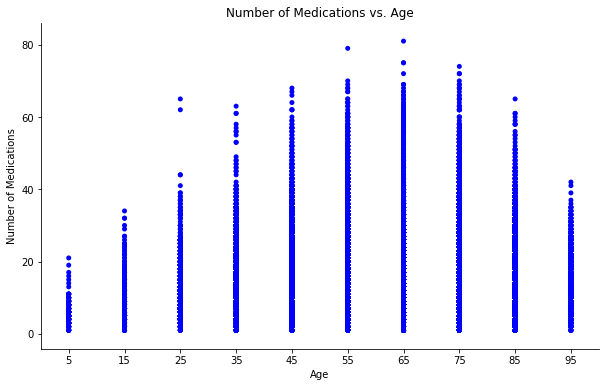

In [30]:
#Let's try to see how the age and number of medicines are correlated
sortage = dd.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'blue')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

#Age and Readmissions,
plot1 = sns.countplot(x = 'age', hue = 'readmitted', data = eda_data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions Balance by Age')
plt.show()

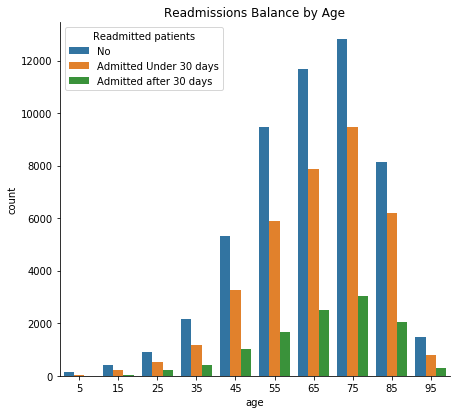

In [31]:
#Age and Readmissions,
plot1 = sns.countplot(x = 'age', hue = 'readmitted', data = dd) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions Balance by Age')
plt.show()

#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = eda_data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

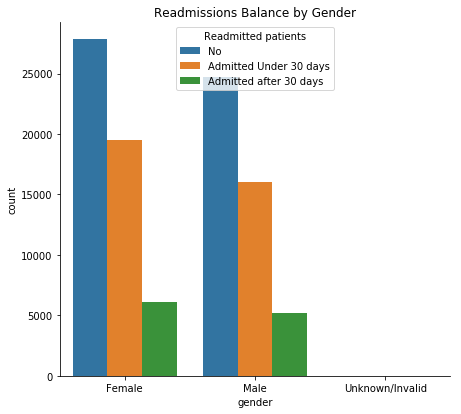

In [32]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = dd) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Admitted Under 30 days', 'Admitted after 30 days'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

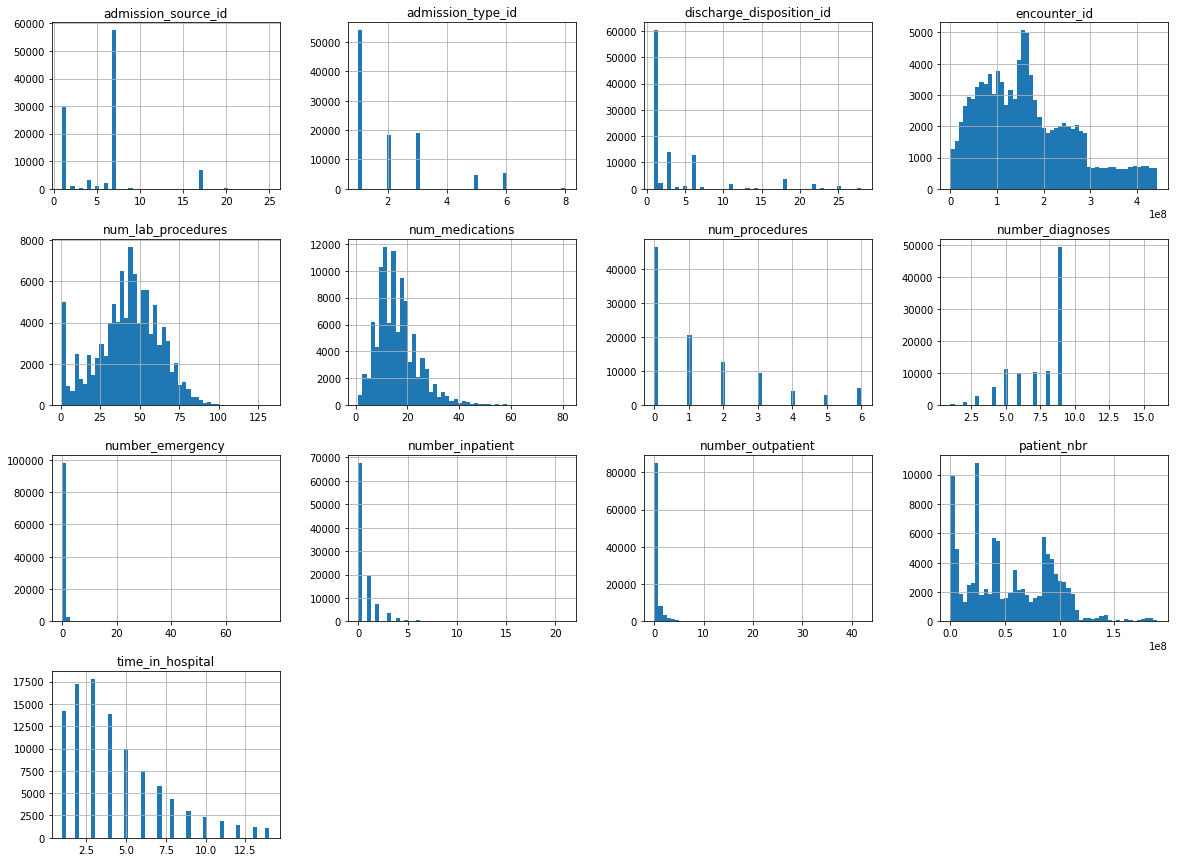

In [33]:
#Plotting the numerical variables in the dataset,

%matplotlib inline
import matplotlib.pyplot as plt
eda_data.hist(bins=50, figsize=(20,15))
plt.show()

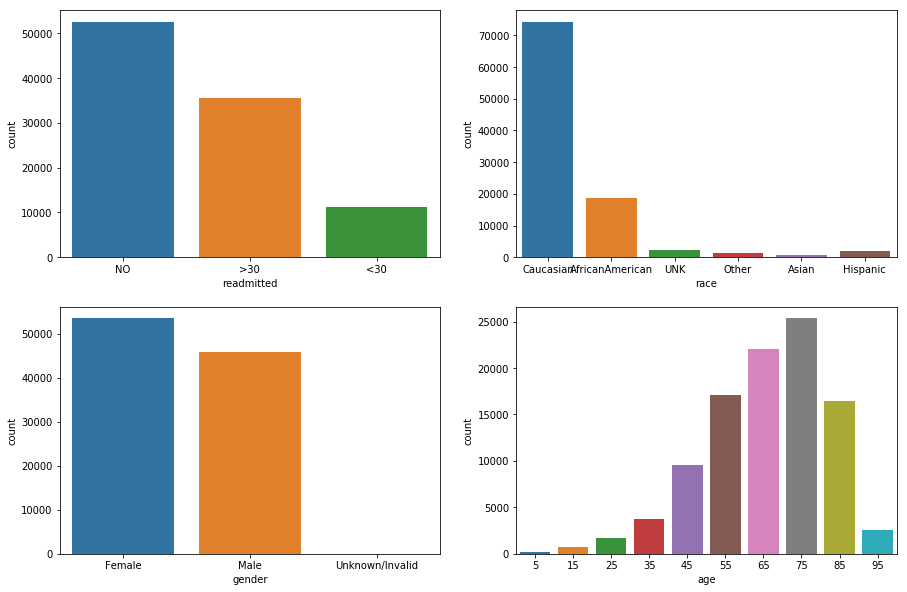

In [34]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=dd, ax=ax[0][0])
sns.countplot(x="race", data=dd, ax=ax[0][1])
sns.countplot(x="gender", data=dd, ax=ax[1][0])
sns.countplot(x="age", data=dd, ax=ax[1][1])

In [35]:

print('Total number of features:', len(cols_nume + cols_all_cat ))
print('Numerical Features:',len(cols_nume))
print('Categorical Features:',len(cols_all_cat))


Total number of features: 132
Numerical Features: 9
Categorical Features: 123


In [36]:
dd[cols_nume + cols_all_cat].isnull().sum().sort_values(ascending = False)

medical_specialty_Urology            0
rosiglitazone_No                     0
glimepiride_No                       0
glimepiride_Steady                   0
glimepiride_Up                       0
acetohexamide_Steady                 0
glipizide_No                         0
glipizide_Steady                     0
glipizide_Up                         0
glyburide_No                         0
glyburide_Steady                     0
glyburide_Up                         0
tolbutamide_Steady                   0
pioglitazone_No                      0
pioglitazone_Steady                  0
pioglitazone_Up                      0
rosiglitazone_Steady                 0
medical_specialty_Surgery-General    0
rosiglitazone_Up                     0
acarbose_No                          0
acarbose_Steady                      0
acarbose_Up                          0
miglitol_No                          0
miglitol_Steady                      0
miglitol_Up                          0
troglitazone_Steady      

In [37]:

#dd['readmission_label'] = (dd.readmitted == '<30').astype('int')
dd['readmission_label'] = diabetic_data['readmission_label']

In [38]:
dd.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Other,medical_specialty_Pediatrics,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_Urology
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,5,6,25,1,1,Other,41,...,0,1,0,0,0,0,0,0,0,0
149190,55629189,Caucasian,Female,15,1,1,7,3,Other,59,...,0,1,0,0,0,0,0,0,0,0
64410,86047875,AfricanAmerican,Female,25,1,1,7,2,Other,11,...,0,1,0,0,0,0,0,0,0,0
500364,82442376,Caucasian,Male,35,1,1,7,2,Other,44,...,0,1,0,0,0,0,0,0,0,0
16680,42519267,Caucasian,Male,45,1,1,7,1,Other,51,...,0,1,0,0,0,0,0,0,0,0


In [39]:
# making a new df 'dd_data' with feature_engineering 'numerical' as well as 'categorical' variables
col2use = cols_nume + cols_all_cat 
dd_data =dd[col2use + ['readmission_label']]
dd_data.head()


,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,...,medical_specialty_Other,medical_specialty_Pediatrics,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-General,medical_specialty_Urology,readmission_label
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,5,1,41,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
149190,15,3,59,0,18,0,0,0,9,0,...,1,0,0,0,0,0,0,0,0,0
64410,25,2,11,5,13,2,0,1,6,0,...,1,0,0,0,0,0,0,0,0,0
500364,35,2,44,1,16,0,0,0,7,0,...,1,0,0,0,0,0,0,0,0,0
16680,45,1,51,0,8,0,0,0,5,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
dd_data['readmission_label'].value_counts(normalize=True) * 100

0    88.611175
1    11.388825
Name: readmission_label, dtype: float64

# Splitting Data into Training and Testing Samples

Now the data would be split into training and validation sets. The idea behind splitting the data is to measure how well the  model would work on unseen data.
In this project, I split into 70% train, 30% validation data.


In [41]:
# 'X' has the feature variables and'Y' has the label
Y = dd_data['readmission_label']
X = dd_data.drop(['readmission_label'], axis =1)


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#Split X and Y into training and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .3, 
                                                random_state = 7, stratify = Y)


In [44]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (69540, 132) (29803, 132)


In [45]:
Ytrain.value_counts(normalize=True) * 100

0    88.610871
1    11.389129
Name: readmission_label, dtype: float64

### Handling Class Imbalance

At this point , I would like to pause and ponder about class imbalance of the dataset.The training set is heavily skewed with ' no readmissions' at 88.61% and ' readmissions' at 11.38%. With a greater imbalanced ratio, the decision function favor the class with the larger number of samples, usually referred as the majority class.This results in inaccuracy in prediction.

In [46]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_rus, y_resampled_rus = rus.fit_resample(Xtrain,Ytrain)
from collections import Counter
print(sorted(Counter(Ytrain).items()))
print(sorted(Counter(y_resampled_rus).items()))


[(0, 61620), (1, 7920)]
[(0, 7920), (1, 7920)]


In [47]:
#Oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled_ros, y_resampled_ros = ros.fit_resample(Xtrain, Ytrain)
from collections import Counter
print(sorted(Counter(Ytrain).items()))
print(sorted(Counter(y_resampled_ros).items()))


[(0, 61620), (1, 7920)]
[(0, 61620), (1, 61620)]


In [212]:
def evaluate_model(testX, testY, mdl, predY):
    #Checking the accuracy,
    accuracy = mdl.score(testX, testY)
    
    # predict probabilities
    probs = mdl.predict_proba(testX)[:,1]
    # calculate AUC
    auc = roc_auc_score(testY, probs)
    # calculate recall
    recall = recall_score(testY, predY)
    # calculate precision
    precision = precision_score(testY, predY)
    # calculate roc curve
    print('ROC Curve')
    fpr, tpr, thresholds = roc_curve(testY, probs)
    # plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the precision-recall curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()
    return accuracy, auc, recall, precision, fpr, tpr


# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

#RFC training with balanced data from oversampling

rfc = RandomForestClassifier(random_state=42,n_estimators=500)
rfc.fit(X_resampled_ros, y_resampled_ros)
Y_pred_rfc = rfc.predict(Xtest)


#Checking the accuracy,
print(" Accuracy of Randomforest classification: ", rfc.score(Xtest, Ytest))

#Printing the confusion matrix,
print(" Confusion Matrix ")
confusion_matrix(Ytest, Y_pred_rfc)

 Accuracy of Randomforest classification:  0.8845418246485253
 Confusion Matrix 


array([[26259,   150],
       [ 3291,   103]], dtype=int64)

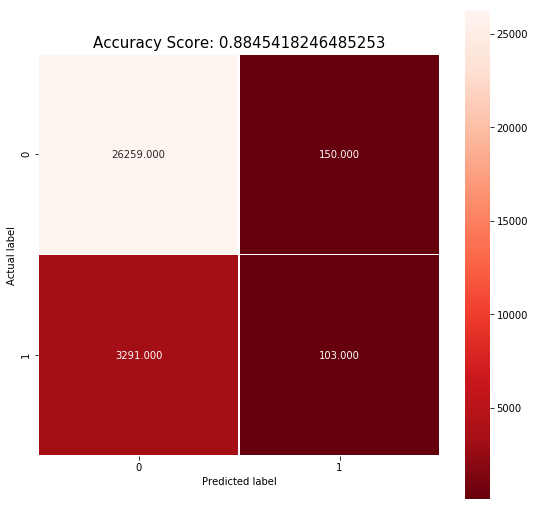

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Y_pred_rfc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [50]:
print(classification_report(Ytest, Y_pred_rfc, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.89      0.99      0.94     26409
     Class 1       0.41      0.03      0.06      3394

   micro avg       0.88      0.88      0.88     29803
   macro avg       0.65      0.51      0.50     29803
weighted avg       0.83      0.88      0.84     29803



In [137]:
#RFC training with balanced data from undersampling
rfc = RandomForestClassifier(random_state=42,n_estimators=500)
rfc.fit(X_resampled_rus, y_resampled_rus)
Y_pred_rfc = rfc.predict(Xtest)

#Checking the accuracy,
print(" Accuracy of Randomforest classification: ", rfc.score(Xtest, Ytest))

#Printing the confusion matrix,
print(" Confusion Matrix ")
confusion_matrix(Ytest, Y_pred_rfc)

 Accuracy of Randomforest classification:  0.623561386437607
 Confusion Matrix 


array([[16598,  9811],
       [ 1408,  1986]], dtype=int64)

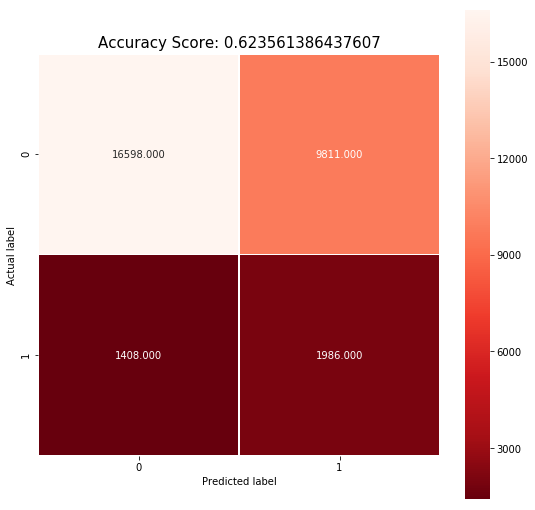

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Y_pred_rfc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [53]:
print(classification_report(Ytest, Y_pred_rfc, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.92      0.63      0.75     26409
     Class 1       0.17      0.59      0.26      3394

   micro avg       0.62      0.62      0.62     29803
   macro avg       0.55      0.61      0.50     29803
weighted avg       0.84      0.62      0.69     29803



ROC Curve


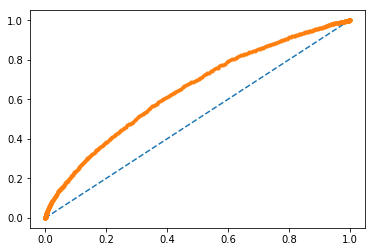

Accuracy : 0.624
AUC      : 0.649
Recall   : 0.585
Precision: 0.168


In [213]:
accuracy_rfc, auc_rfc, recall_rfc, precision_rfc,fpr_rfc, tpr_rfc = evaluate_model(Xtest, Ytest, rfc,Y_pred_rfc)

print('Accuracy : %.3f' % accuracy_rfc)
print('AUC      : %.3f' % auc_rfc)
print('Recall   : %.3f' % recall_rfc)
print('Precision: %.3f' % precision_rfc)

For negating the class imbalance , I did both oversampling and undersampling to balance the data and then trained the RandomForest Classifer on both the resultant balanced data set. It can be observed that with oversampling, although the accuracy is 88%, the True Negative prediction is very less , 110. In the case of training data setbalanced using undersampling, although the accuracy is  62%, the TN prediction is 1991. Since that the non -dominant class, accuracy in predicting non-dominant class correctly would be taken as criteria for the  preferrred balanced data set, so I would be proceeding with testing further algorithms on  balanced dataset obtained by undersampling.

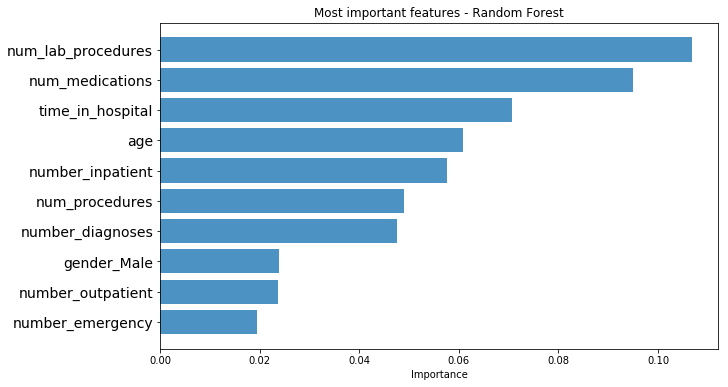

In [54]:
#Determining which features are most important,
feature_names = Xtrain.columns
feature_imports = rfc.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# Logistic Regression

In [148]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005,solver='lbfgs',max_iter = 200)
lreg.fit(X_resampled_rus, y_resampled_rus)
Y_pred_lreg = lreg.predict(Xtest)

In [149]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,lreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6499010166761735


In [150]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_pred_lreg))

[[17576  8833]
 [ 1601  1793]]


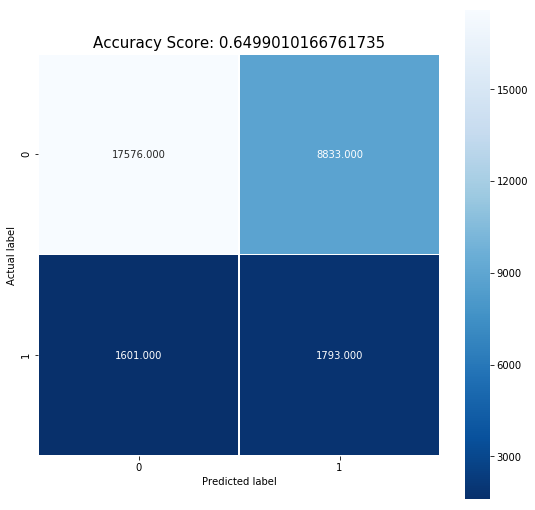

In [151]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Y_pred_lreg), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [152]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Y_pred_lreg, target_names = ['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.92      0.67      0.77     26409
     Class 1       0.17      0.53      0.26      3394

   micro avg       0.65      0.65      0.65     29803
   macro avg       0.54      0.60      0.51     29803
weighted avg       0.83      0.65      0.71     29803



ROC Curve


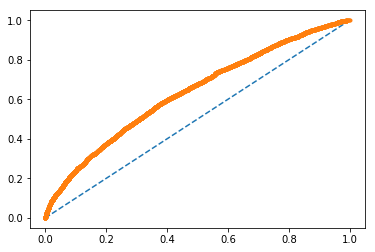

Accuracy : 0.650
AUC      : 0.636
Recall   : 0.528
Precision: 0.169


In [214]:
accuracy_lreg, auc_lreg, recall_lreg, precision_lreg,fpr_lreg,tpr_lreg = evaluate_model(Xtest, Ytest, lreg,Y_pred_lreg)
print('Accuracy : %.3f' % accuracy_lreg)
print('AUC      : %.3f' % auc_lreg)
print('Recall   : %.3f' % recall_lreg)
print('Precision: %.3f' % precision_lreg)

# Gradient Boosting Classifier

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_resampled_rus, y_resampled_rus)
Y_pred_gbc =gbc.predict(Xtest)

ROC Curve


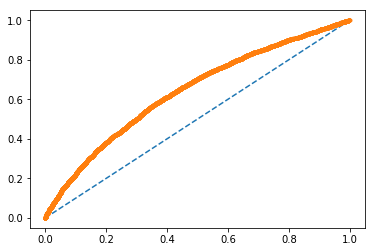

Accuracy : 0.614
AUC      : 0.641
Recall   : 0.597
Precision: 0.166


In [215]:
accuracy_gbc, auc_gbc, recall_gbc, precision_gbc ,fpr_gbc, tpr_gbc = evaluate_model(Xtest, Ytest, gbc,Y_pred_gbc)
print('Accuracy : %.3f' % accuracy_gbc)
print('AUC      : %.3f' % auc_gbc)
print('Recall   : %.3f' % recall_gbc)
print('Precision: %.3f' % precision_gbc)

In [64]:
print("The accuracy of Gradient Boosting Classifier model: ", gbc.score(Xtest, Ytest))

The accuracy of Gradient Boosting Classifier model:  0.6137301613931483


In [65]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Y_pred_gbc))

[[16266 10143]
 [ 1369  2025]]


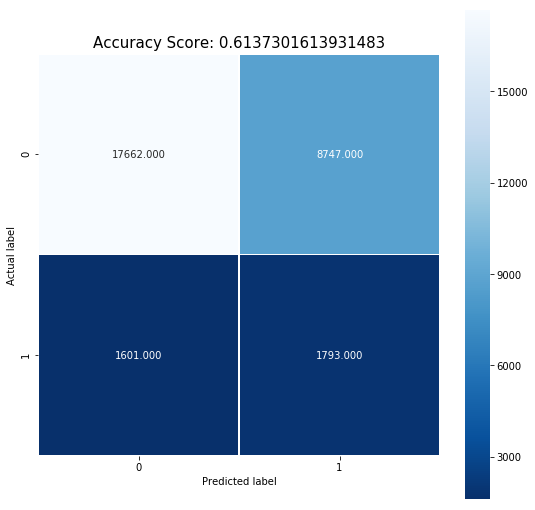

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Y_pred_log_reg), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gbc.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

# AdaBoosted Classification model

In [162]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
ada.fit(X_resampled_rus, y_resampled_rus)
Y_pred_ada = ada.predict(Xtest)

In [68]:
print("The accurary of AdaBoosted Classification model: ", ada.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6713418112270577


ROC Curve


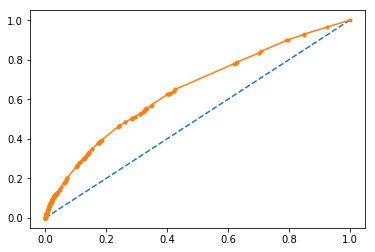

Accuracy : 0.671
AUC      : 0.650
Recall   : 0.527
Precision: 0.179


In [216]:
accuracy_ada, auc_ada, recall_ada, precision_ada , fpr_ada, tpr_ada = evaluate_model(Xtest, Ytest, ada,Y_pred_ada)
print('Accuracy : %.3f' % accuracy_ada)
print('AUC      : %.3f' % auc_ada)
print('Recall   : %.3f' % recall_ada)
print('Precision: %.3f' % precision_ada)

In [69]:
#Checking the confusion matrix,
print(confusion_matrix(Ytest, Y_pred_ada))

[[18219  8190]
 [ 1605  1789]]


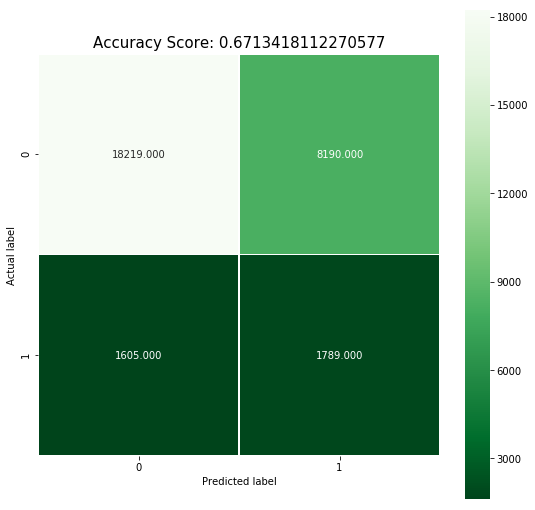

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Y_pred_ada), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ada.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [71]:
#Checking recall, f1 :-
print(classification_report(Ytest, Y_pred_ada, target_names = ['Class 0', '']))

              precision    recall  f1-score   support

          NO       0.92      0.69      0.79     26409
         YES       0.18      0.53      0.27      3394

   micro avg       0.67      0.67      0.67     29803
   macro avg       0.55      0.61      0.53     29803
weighted avg       0.83      0.67      0.73     29803



In [72]:
# calculate the False Positive and True Positive rate to get the ROC curve  
Y_pred_ada = ada.decision_function(Xtest)
fpr_ada, tpr_ada, thresholds = roc_curve(Ytest, Y_pred_ada)

In [165]:
# Doing Hyper parameter tuning,
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam ={
        'n_estimators': [100, 200,500],
        'learning_rate': [0.2,0.5,1.0],
},
adagrid = GridSearchCV(ada_boost, cv=3, n_jobs=3, param_grid=gridparam)
adagrid.fit(X_resampled_rus, y_resampled_rus)
Y_pred_adagrid = adagrid.predict(Xtest)

In [75]:
Y_grid_ada = adagrid.predict(Xtest)
print(classification_report(Ytest,Y_pred_adagrid, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.92      0.68      0.78     26409
         YES       0.18      0.55      0.27      3394

   micro avg       0.66      0.66      0.66     29803
   macro avg       0.55      0.61      0.53     29803
weighted avg       0.84      0.66      0.72     29803



In [74]:
#The accuracy of the model with the best parameters
adagrid.score(Xtest, Ytest)

0.6628527329463477

ROC Curve


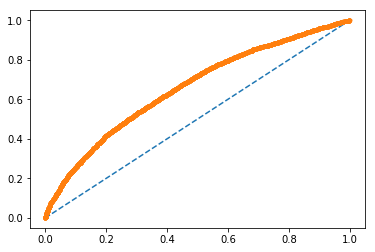

Accuracy : 0.663
AUC      : 0.659
Recall   : 0.546
Precision: 0.179


In [217]:
accuracy_adagrid, auc_adagrid, recall_adagrid, precision_adagrid, fpr_adagrid, tpr_adagrid = evaluate_model(Xtest, Ytest, adagrid,Y_pred_adagrid)
print('Accuracy : %.3f' % accuracy_adagrid)
print('AUC      : %.3f' % auc_adagrid)
print('Recall   : %.3f' % recall_adagrid)
print('Precision: %.3f' % precision_adagrid)

# Decision Tree Classifier

In [76]:
Y_grid_ada_score = adagrid.decision_function(Xtest)
fpr_adamod, tpr_adamod, thresholds_grid_ada = roc_curve(Ytest, Y_grid_ada)

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [78]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(X_resampled_rus, y_resampled_rus)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [79]:
Y_pred_dt = clfgini.predict(Xtest)


array([0, 1, 1, ..., 0, 1, 1])

In [80]:
print( "Accuracy is ", accuracy_score(Ytest,Y_pred_dt)*100)

Accuracy is  60.18186088648794


ROC Curve


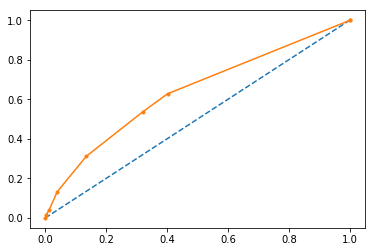

Accuracy : 0.602
AUC      : 0.637
Recall   : 0.628
Precision: 0.167


In [218]:
accuracy_clfgini, auc_clfgini, recall_clfgini, precision_clfgini,fpr_clfgini, tpr_clfgini = evaluate_model(Xtest, Ytest, clfgini,Y_pred_dt)
print('Accuracy : %.3f' % accuracy_clfgini)
print('AUC      : %.3f' % auc_clfgini)
print('Recall   : %.3f' % recall_clfgini)
print('Precision: %.3f' % precision_clfgini)

# K nearest neighbors (KNN)

In [168]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_resampled_rus, y_resampled_rus)
Y_pred_knn = knn.predict(Xtest)

ROC Curve


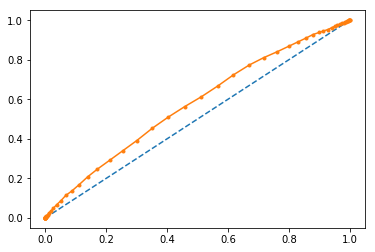

Accuracy : 0.586
AUC      : 0.575
Recall   : 0.510
Precision: 0.140


In [219]:
accuracy_knn, auc_knn, recall_knn, precision_knn , fpr_knn, tpr_knn = evaluate_model(Xtest, Ytest, knn,Y_pred_knn)
print('Accuracy : %.3f' % accuracy_knn)
print('AUC      : %.3f' % auc_knn)
print('Recall   : %.3f' % recall_knn)
print('Precision: %.3f' % precision_knn)

In [220]:
print("Model   "       "Accuracy "       " AUC  "     " Recall "   " Precision")
print("RFC  ", "   %.3f "%accuracy_rfc, " %.3f "%auc_rfc," %.3f"%recall_rfc,"  %.3f "%precision_rfc)
print("LREG  ", "  %.3f "%accuracy_lreg, " %.3f "%auc_lreg," %.3f"%recall_lreg,"  %.3f "%precision_lreg)
print("GBC  ", "   %.3f "%accuracy_gbc, " %.3f "%auc_gbc," %.3f"%recall_gbc,"  %.3f "%precision_gbc)
print("ADA  ", "   %.3f "%accuracy_ada, " %.3f "%auc_ada," %.3f"%recall_ada,"  %.3f "%precision_ada)
print("ADAgrid"," %.3f "%accuracy_adagrid," %.3f "%auc_adagrid," %.3f "%recall_adagrid," %.3f "%precision_adagrid)
print("CLFGini"," %.3f "%accuracy_clfgini," %.3f "% auc_clfgini," %.3f "% recall_clfgini," %.3f "% precision_clfgini)
print("KNN  ", "   %.3f "%accuracy_knn, " %.3f "% auc_knn," %.3f"%recall_knn,"  %.3f "%precision_knn)

Model   Accuracy  AUC   Recall  Precision
RFC      0.624   0.649   0.585   0.168 
LREG     0.650   0.636   0.528   0.169 
GBC      0.614   0.641   0.597   0.166 
ADA      0.671   0.650   0.527   0.179 
ADAgrid  0.663   0.659   0.546   0.179 
CLFGini  0.602   0.637   0.628   0.167 
KNN      0.586   0.575   0.510   0.140 


C:\Users\manju\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'True Positive Rate')

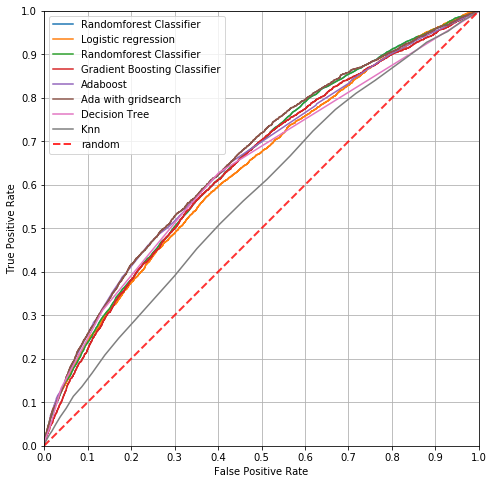

In [249]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_rfc, tpr_rfc, label='Randomforest Classifier')
plt.plot(fpr_lreg, tpr_lreg, label='Logistic regression')
plt.plot(fpr_rfc, tpr_rfc, label='Randomforest Classifier')
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier')
plt.plot(fpr_ada, tpr_ada, label='Adaboost')
plt.plot(fpr_adagrid, tpr_adagrid, label='Ada with gridsearch')
plt.plot(fpr_clfgini, tpr_clfgini, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='Knn')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Summary

         1) Looking at the tabular column, ADA Boosting Classifier with gridsearch has the best AUC and would be the model of 
            choice for prediction in this project 
         2) However,accuracy of all the models ranges between 58-67%. Further, applying more pre-processing techniques might 
            help improve the accuracy. 
         3) With this ML model, it is possible to predict the probability of a patient with diabetes getting readmitted   
            within 30 days with 66% accuracy and AUC of 0.67. 